In [3]:
import pandas
#bucket = 'lab-11'
#data_key='house_price.xls'
#data_location ='s3://{}/{}'.format(bucket,data_key)

df = pandas.read_excel("s3://lab-11-a/house_price.xls")

df[:10]

,price,bathroom,house_type,lot_size,built_in,area
0,159900,1,single-family home,5662,1924,1584
1,1100000,1,single-family home,4138200,1932,900
2,182000,2,condo,7405,1945,1622
3,169900,1,single-family home,36155,1950,1556
4,148500,1,single-family home,9147,1959,1000
5,444900,6,single-family home,28314,1961,5201
6,178000,2,single-family home,11326,1964,1188
7,209000,2,single-family home,9147,1966,1918
8,349900,2,single-family home,204732,1967,3850
9,1100000,2,single-family home,4356000,1970,2541


In [4]:
df.describe()

,price,bathroom,lot_size,built_in,area
count,3.000000e+01,30.000000,3.000000e+01,30.000000,30.000000
mean,3.567000e+05,2.866667,3.024873e+05,1982.766667,2495.666667
std,2.500429e+05,1.407696,1.073243e+06,25.078750,1370.128847
min,1.349000e+05,1.000000,2.178000e+03,1924.000000,900.000000
25%,1.756750e+05,2.000000,8.820750e+03,1966.250000,1465.250000
50%,3.024000e+05,2.500000,1.372150e+04,1987.000000,2069.500000
75%,4.365000e+05,4.000000,2.178000e+04,2001.750000,3148.750000
max,1.100000e+06,6.000000,4.356000e+06,2018.000000,5299.000000


In [5]:
df.hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92a8a80cf8>,
      dtype=object)

In [6]:
df.groupby('house_type').mean()

,price,bathroom,lot_size,built_in,area
house_type,,,,,
condo,164450.000000,2.500000,4791.500000,1975.500000,1449.000000
single-family home,387973.076923,2.923077,348478.615385,1982.269231,2677.384615
townhouse,142400.000000,2.500000,2295.500000,1996.500000,1180.000000


In [7]:
df['price']

0      159900
1     1100000
2      182000
3      169900
4      148500
5      444900
6      178000
7      209000
8      349900
9     1100000
10     239000
11     149900
12     294900
13     625000
14     309900
15     179900
16     339900
17     134900
18     359000
19     529900
20     149900
21     394000
22     229900
23     439000
24     146900
25     174900
26     445000
27     659000
28     429000
29     429000
Name: price, dtype: int64

In [8]:
#!pip install mglearn

    100% |████████████████████████████████| 542kB 22.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for mglearn ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import pandas
import numpy as np
import mglearn
from collections import Counter
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing

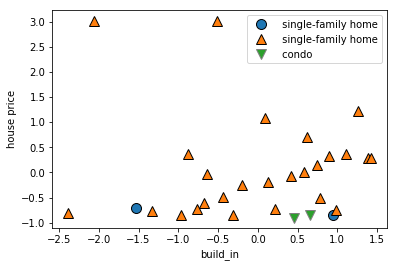

In [10]:
X = np.column_stack((df.built_in.astype(float),df.price.astype(float))) 
X = preprocessing.scale(X) # scale the data before training the model
y = df.house_type
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.3,stratify = y, random_state=0) 

# for classification, make sure a stratify splitting method is selected
mglearn.discrete_scatter(X[:,0],X[:,1],y) # use mglearn to visualize data

plt.legend(y,loc='best')
plt.xlabel('build_in')
plt.ylabel('house price')
plt.show()

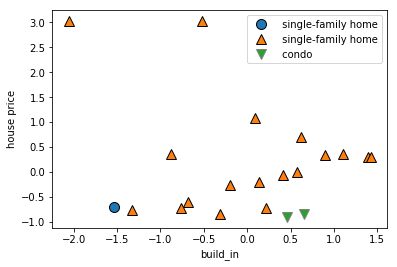

Training set accuracy: 1.00
Training Kappa: 1.000
Test set accuracy: 0.67
Test Kappa: 0.156


In [11]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(10,), random_state=0).fit(X_train, y_train)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],mlp.predict(X_train))
plt.legend(y,loc='best')
plt.xlabel('build_in')
plt.ylabel('house price')
plt.show()

print("Training set accuracy: {:.2f}".format(mlp.score(X_train, y_train)))
print ("Training Kappa: {:.3f}".format(cohen_kappa_score(y_train,mlp.predict(X_train))))
print("Test set accuracy: {:.2f}".format(mlp.score(X_test, y_test)))
print ("Test Kappa: {:.3f}".format(cohen_kappa_score(y_test,mlp.predict(X_test))))

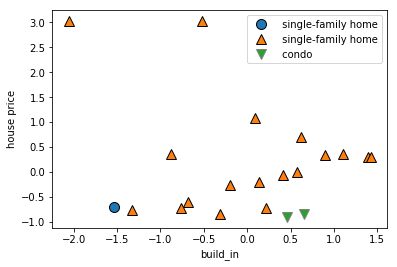

Training set accuracy: 1.00
Training Kappa: 1.000
Test set accuracy: 0.56
Test Kappa: 0.122


In [12]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs',  hidden_layer_sizes=(20,20,20), random_state=0).fit(X_train, y_train)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],mlp.predict(X_train))
plt.legend(y,loc='best')
plt.xlabel('build_in')
plt.ylabel('house price')
plt.show()

print("Training set accuracy: {:.2f}".format(mlp.score(X_train, y_train)))
print ("Training Kappa: {:.3f}".format(cohen_kappa_score(y_train,mlp.predict(X_train))))
print("Test set accuracy: {:.2f}".format(mlp.score(X_test, y_test)))
print ("Test Kappa: {:.3f}".format(cohen_kappa_score(y_test,mlp.predict(X_test))))

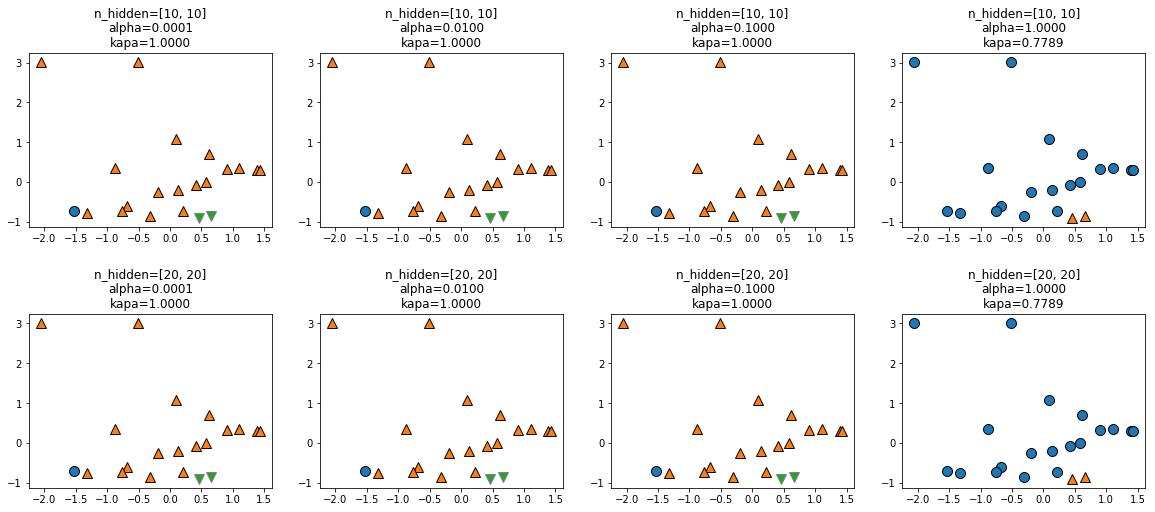

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 20]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)

        mlp.fit(X_train, y_train)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], mlp.predict(X_train), ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}\nkapa={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha,cohen_kappa_score(y_train,mlp.predict(X_train))))
        
plt.subplots_adjust(hspace=0.5)

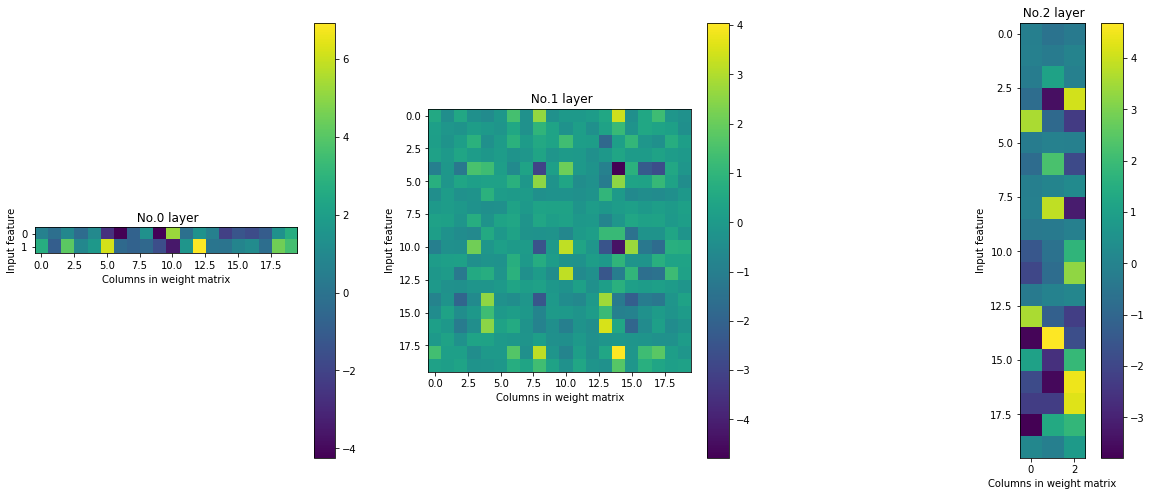

In [14]:
mlp = MLPClassifier(solver='lbfgs',  hidden_layer_sizes=(20,20), random_state=0).fit(X_train, y_train)
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
for i , ax in zip(range(3),axes):

    img = ax.imshow(mlp.coefs_[i], interpolation='none', cmap='viridis')

    ax.set_title(" No.{} layer".format(i))
    ax.set_xlabel("Columns in weight matrix")
    ax.set_ylabel("Input feature")
    fig.colorbar(img, ax = ax)